# Table of Contents
* [Approach](#Approach)
* [Characteristic function](#Characteristic-function)
	* [Experimental concept](#Experimental-concept)
	* [Dataset](#Dataset)
		* [Earthquake selection](#Earthquake-selection)
		* [Read data](#Read-data)
* [Pre-processing](#Pre-processing)


# Approach

Invert the source parameters that explainned the observed caracterisitic function. 
- The first step is to estimate each sample probability of being the result of ambient seismic noise, or of a body-wave arrival.
    - **CECM** (Nagano 1989) & Sta Lta (Allen 1982) : high correlation coefficients are obtained with isotropic noise
    - The detection threshold value is dynamic (function of the mean and standard deviation, Baer & Kradolfer 1987).
    - Multiband processing based on multiscale approach (Lomax et al. 2012)
>To be tested
> - Set a dynamic detection threshold based on **Kurtosis** (Saragiotis et al., 2002 ; Ross and Ben-Zion, 2014)
> - SNI : high correlation coefficients are obtained with diffuse noise
> - Auto-correlation peak width ($ \propto \frac{1}{w} $)

- The seconde step is to perform an inversion of the caracteristic functions of find the parameter of the corresponding events.
>To be tested
> - follow the **NonLinLoc** inversion procedure for continous CFs
> - migration of CFs 
> - **back projection** of CFs
> - ... and with differential CFs

The triggering algorithms are can be integrated in the class hierarchy of table below

**Table 1**: a class hierarchy for triggering algorithms

pre-processor|multiplexor|processor|post-processor
-:|:-:|:-:|-
RMS|LT-ST|ratio|derivation
Average|RW-LW|correlation|Kurtosis
|component||
**attribute**|**method**|**class**|**class**

# Methods for characteristic functions
We aim to propose a method to characterise the probability of arrivals 
- for volumic waves, 
- independant form frequency range,
- with minimun parameterization.

## CECM
The component energy correlation method is based on the correlation of the RMS time series of the 3d components of ground displacements. A multi-scaling approach is used to be sensitive to all kinds of seismicity.

## Generalized correlation CF
Compared to the ratio operator (use in STA/LTA and RW/LW methods) and to the derivation operator, the correlation operator has two advantages:
- it is finite (it ranges between 0 and 1),
- it is ... (it can be enhanced with product operator and still range between 0 and 1).

These two advantages allow two things:
- the quantitative assessment of threshold,
- the quantitative comparison of multiple properties even different in nature.

How about using the correlation in place of the ratio and derivate operators? The ratio operator in frenquncy is actually an approximation of the correlation, in time. Using a correlation operator, would be a more reliable paradigm. The correlations of the time evolutions $f$ and $g$ of two statistical properties is actually a approximation the deconvolution of the same two signals: 

\begin{align}
\mathcal{F}\{f * g\}& = k \cdot \mathcal{F}\{f\} \cdot \mathcal{F}\{g\} &
\text{and } \mathcal{F}\{f * g^*(-)\} =& k\cdot \dfrac{ \mathcal{F}\{f\} }{ \mathcal{F}\{g\} } \\
\text{then } \mathcal{F}\{f\star g\}& = \mathcal{F}\{f\} \cdot (\mathcal{F}\{g\})^* &
=& k\cdot \dfrac{ \mathcal{F}\{f\} \cdot \mathcal{F}\{g^*(-)\} }{ |\mathcal{F}\{g\}| } 
\end{align}

where $\mathcal{F}$ denotes the Fourier transform, and an $^{\ast}$ indicates the complex conjugate.  Coupled with fast Fourier transform algorithms, this property is often exploited for the efficient numerical computation of cross-correlations (see Circular convolution theorem and cross-correlation theorem).

## Multiscale
Allow to get rid of params

# Tests
## Conceptual data
Assume a obspy.Stream with 0) noise (trace Ns) 1) two amplitudes changes simulating P and S wave trains (trace A) 2) two frequency changes (trace F) 3) two polarity changes (trace P)  

<IPython.core.display.Javascript object>


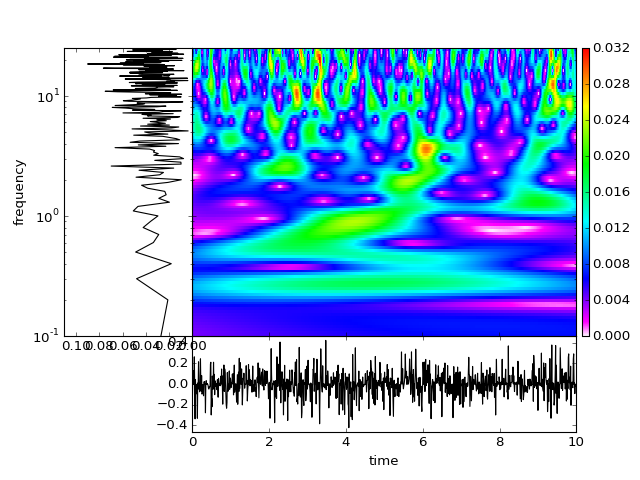

<IPython.core.display.Javascript object>


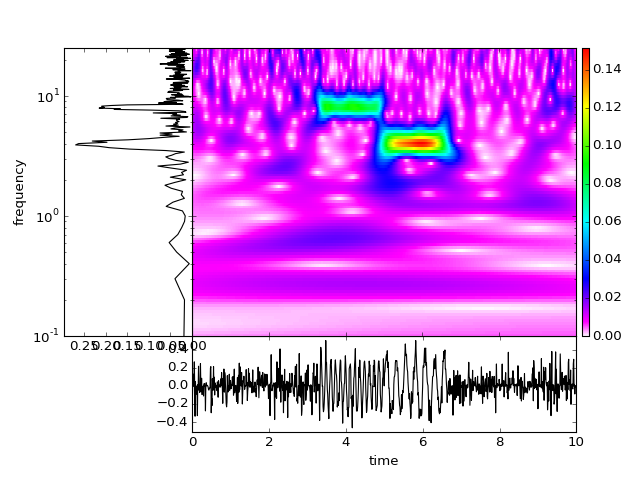

<IPython.core.display.Javascript object>


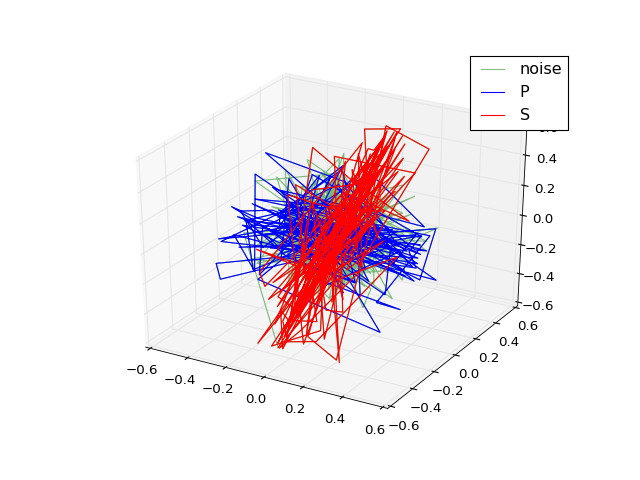

In [150]:
%matplotlib notebook
import sys 
import matplotlib.pyplot as plt
from obspy.signal.tf_misfit import plotTfr

sys.path.append("/Users/massin/Documents/Projects/NaiNo-Kami/Py/NnK/NnK/")
import tseries, wrapper, trigger
reload(trigger)

npts=1000
a = trigger.ideal_stream(npts=npts)
plotTfr((a[0]).data, dt=.01, fmin=0.1, fmax=25)
plotTfr((a[2]).data, dt=.01, fmin=0.1, fmax=25)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(a[3].data, a[4].data, a[5].data, label='noise', alpha=.5, color='g')
ax.plot(a[3].data[npts/3:npts/3+npts/6],a[4].data[npts/3:npts/3+npts/6],a[5].data[npts/3:npts/3+npts/6], label='P', color='b')
ax.plot(a[3].data[npts*3/6:npts*3/6+npts/6],a[4].data[npts*3/6:npts*3/6+npts/6],a[5].data[npts*3/6:npts*3/6+npts/6], label='S', color='r')
ax.legend()
plt.show()

## Comparison
$\star c_{rms}$ can be compared to $ \bar{st}$/$\bar{lt} $ and $\bar{st}\star\bar{lt}$ ...

<IPython.core.display.Javascript object>


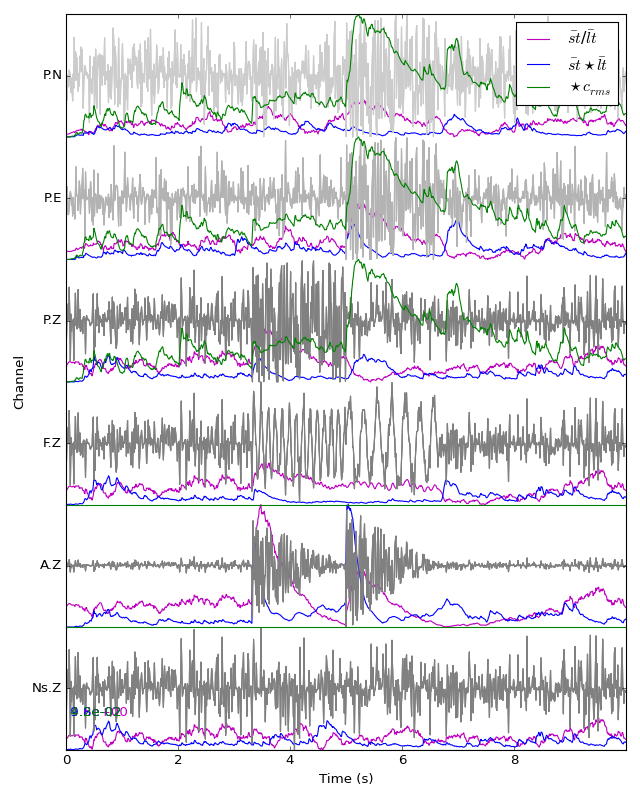

In [151]:
###
reload(trigger)
stlt_multiplexor = trigger.ShortLongTerms(data=a, statistic='average')#, scales=[3, 30])
cecm_multiplexor = trigger.Component(data=a, statistic='rms')#, scales=[32])
## 
# stlt_multiplexor.plot()#
# cecm_multiplexor.plot()#
stlt_a_ratio = trigger.Ratio(stlt_multiplexor.output(), stlt_multiplexor.data)
stlt_a_corr = trigger.Correlate(stlt_multiplexor.output(), stlt_multiplexor.data)
comp_e_corr = trigger.Correlate(cecm_multiplexor.output(), cecm_multiplexor.data)
##
ax = stlt_a_ratio.plot(label=r'$\bar{st}$/$\bar{lt}$')#
stlt_a_corr.plot(ax=ax, cfcolor='b', label=r'$\bar{st}\star\bar{lt}$')#
comp_e_corr.plot(ax=ax, cfcolor='g', label=r'$\star c_{rms}$')#
legend = ax.legend()

[<matplotlib.figure.Figure object at 0x33f909dd0>, <matplotlib.figure.Figure object at 0x3412f2fd0>, <matplotlib.figure.Figure object at 0x34365b890>, <matplotlib.figure.Figure object at 0x33f909d50>]


## Dataset

We need a waveform dataset for developpement.

All earthquake records are indexed in a catalog (a flat file).
In a first attempt, we select earthquake records randomly in the catalog, by filtering only vertical components. We then get the corresponding horizontal records.
A better selection (respecting the G-R law, with a large distance range) can be obtained by adapting the catalog where earthquakes record are indexed.

### Earthquake selection
Linear grid along distances and magnitudes for now...

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  obspy.clients.filesystem.sds import Client
from  obspy.core.utcdatetime import UTCDateTime

import sys 
sys.path.append("/Users/massin/Documents/Projects/NaiNo-Kami/Py/NnK/NnK/")
import trigger
reload(trigger)

client = Client("/Users/massin/Documents/Data/ANT/sds/")  
catalog = "/Users/massin/Documents/Data/ANT/Inventory/arrivals-hybrid.Id-Net-Sta-Type-W_aprio-To-D-Az-Inc-hh-mm-t_obs-tt_obs-tt_calc-t_calc-res-W_apost-F_peak-F_median-A_max-A_unit-Id-Ot-Md-Lat-Lon-Dep-Ex-Ey-Ez-RMS-N_P-N_S-D_min-Gap-Ap-score_S-score_M"

names=('Networks','Stations','Waves', 'weights','Origin time', 'Distances','Hours', 'Minuts', 'Seconds', 'Magnitudes')
columns=(1, 2, 3, 4, 5, 6, 9, 10, 11, 23)
metadata = np.genfromtxt(catalog, usecols=columns, comments="Id", names=names, dtype=None)

0 Trace(s) in Stream:

1 Trace(s) in Stream:
MQ.TRM.90.EHZ | 2007-05-28T03:15:03.180000Z - 2007-05-28T03:15:33.180000Z | 100.0 Hz, 3001 samples


/usr/local/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


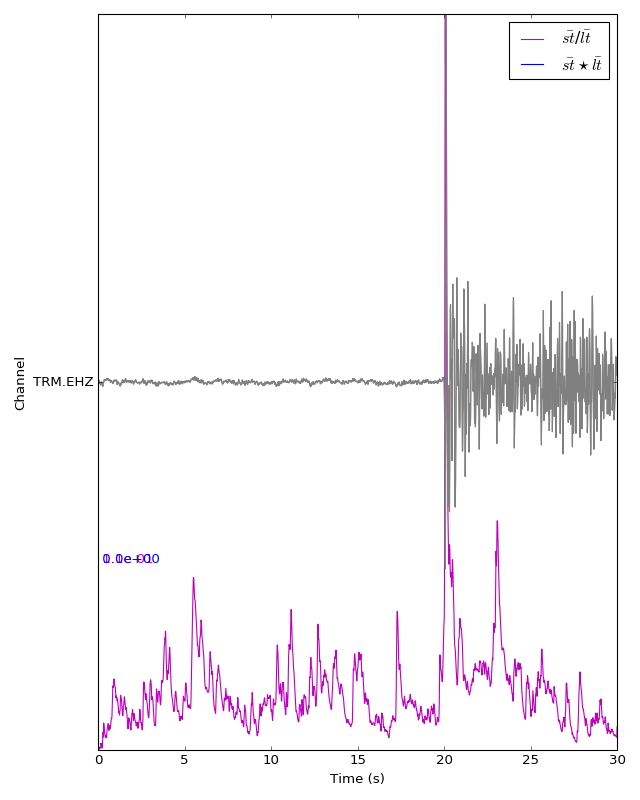

0.109759002455 0.00736419927881
1 Trace(s) in Stream:
MQ.CPM.90.EHZ | 2005-03-07T23:44:21.009900Z - 2005-03-07T23:44:50.619900Z | 100.0 Hz, 2962 samples


<IPython.core.display.Javascript object>


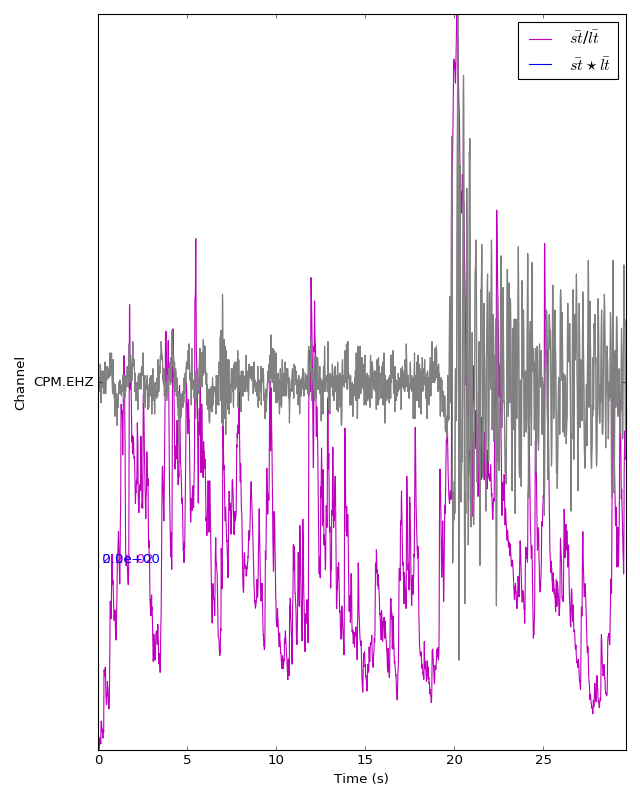

0.0221099961315 0.0057743568414
1 Trace(s) in Stream:
GL.STG.80.EHZ | 2006-11-16T22:26:49.540700Z - 2006-11-16T22:27:15.529052Z | 100.2 Hz, 2604 samples


<IPython.core.display.Javascript object>


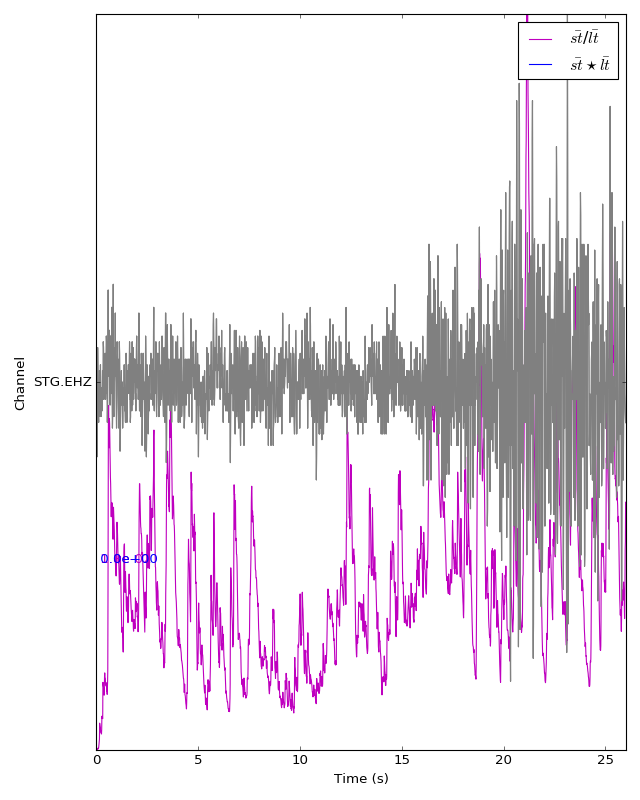

0.0182272366467 0.00372858005886
1 Trace(s) in Stream:
GL.BBL.80.EHZ | 2005-10-23T10:38:20.263040Z - 2005-10-23T10:38:50.264961Z | 100.2 Hz, 3006 samples


<IPython.core.display.Javascript object>


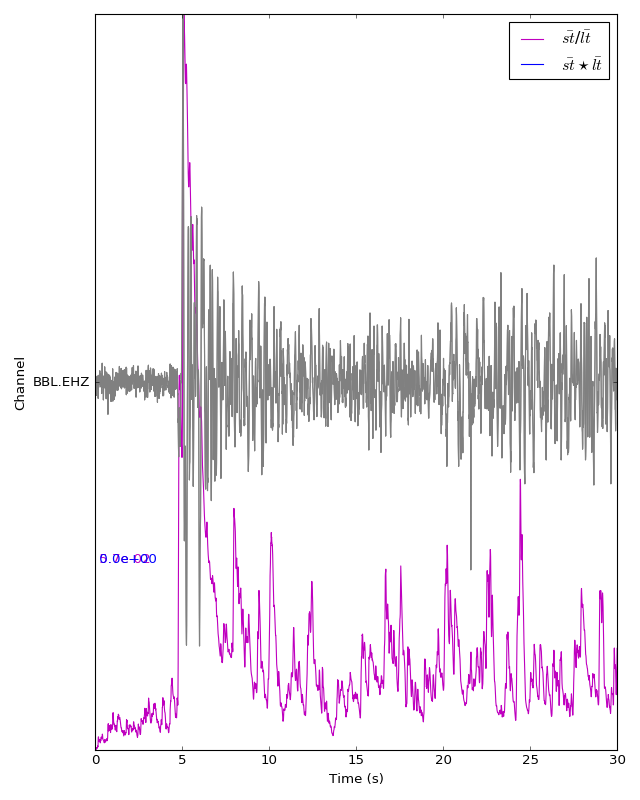

0.0574644963718 0.00529738533911
1 Trace(s) in Stream:
GL.MOG.80.EHZ | 2008-09-04T18:31:33.602112Z - 2008-09-04T18:32:03.604033Z | 100.2 Hz, 3006 samples


<IPython.core.display.Javascript object>


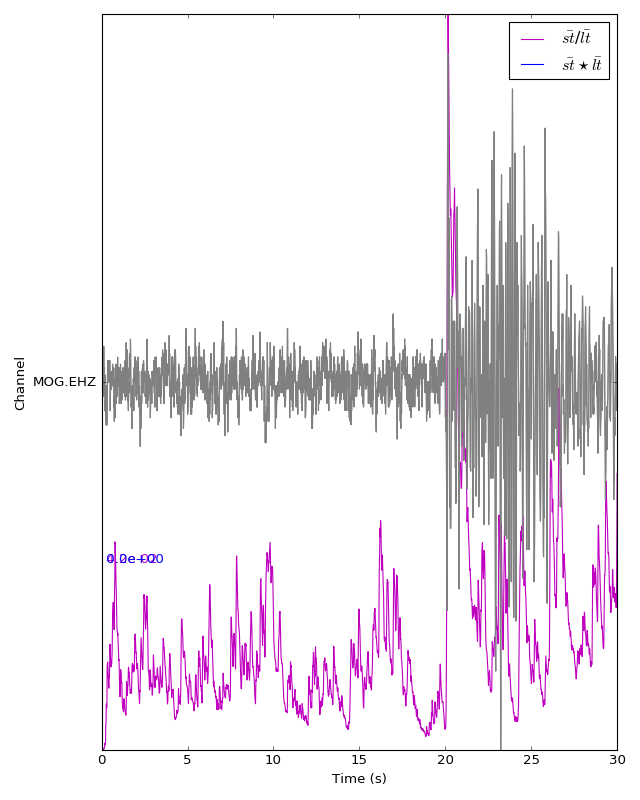

0.0416323902145 0.00482236313333
3 Trace(s) in Stream:
GL.DEG.80.EHZ | 2007-03-04T08:25:52.212481Z - 2007-03-04T08:26:22.214401Z | 100.2 Hz, 3006 samples
GL.DEG.80.EHE | 2007-03-04T08:25:52.212481Z - 2007-03-04T08:26:22.214401Z | 100.2 Hz, 3006 samples
GL.DEG.80.EHN | 2007-03-04T08:25:52.212481Z - 2007-03-04T08:26:22.214401Z | 100.2 Hz, 3006 samples


<IPython.core.display.Javascript object>


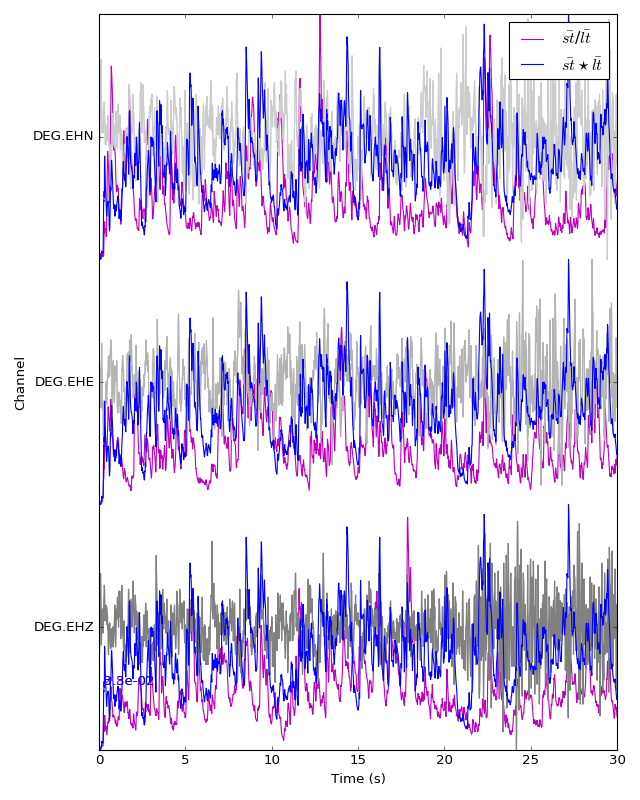

0.028131615869 0.00613175287452
0 Trace(s) in Stream:

3 Trace(s) in Stream:
MQ.FDF.90.EHN | 2006-01-15T08:27:45.810000Z - 2006-01-15T08:28:15.810000Z | 100.0 Hz, 3001 samples
MQ.FDF.90.EHE | 2006-01-15T08:27:45.810000Z - 2006-01-15T08:28:15.810000Z | 100.0 Hz, 3001 samples
MQ.FDF.90.EHZ | 2006-01-15T08:27:45.810000Z - 2006-01-15T08:28:15.810000Z | 100.0 Hz, 3001 samples


<IPython.core.display.Javascript object>


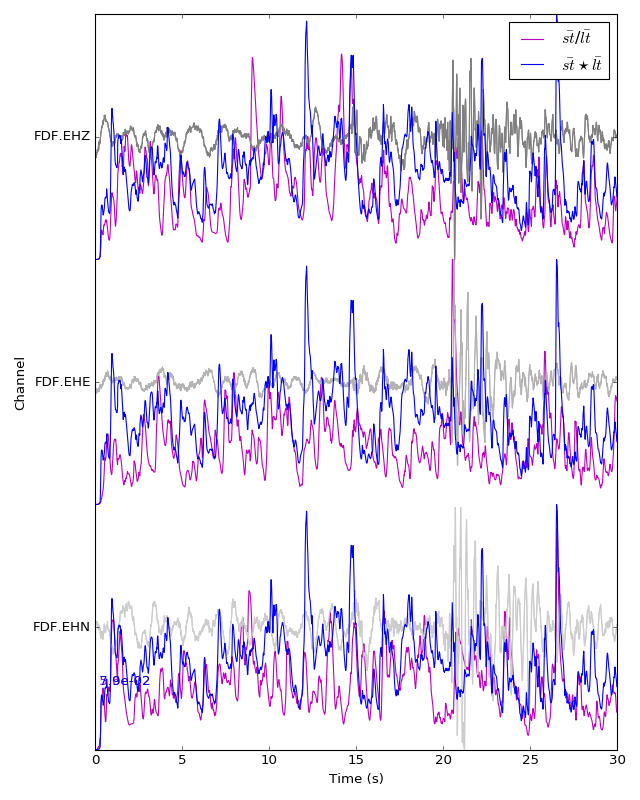

0.0561294592666 0.0133014157183
0 Trace(s) in Stream:

0 Trace(s) in Stream:

3 Trace(s) in Stream:
RA.THMA.00.HNZ | 2008-04-16T18:54:47.006000Z - 2008-04-16T18:55:06.382000Z | 125.0 Hz, 2423 samples
RA.THMA.00.HNN | 2008-04-16T18:54:47.006000Z - 2008-04-16T18:55:06.382000Z | 125.0 Hz, 2423 samples
RA.THMA.00.HNE | 2008-04-16T18:54:47.006000Z - 2008-04-16T18:55:06.382000Z | 125.0 Hz, 2423 samples


<IPython.core.display.Javascript object>


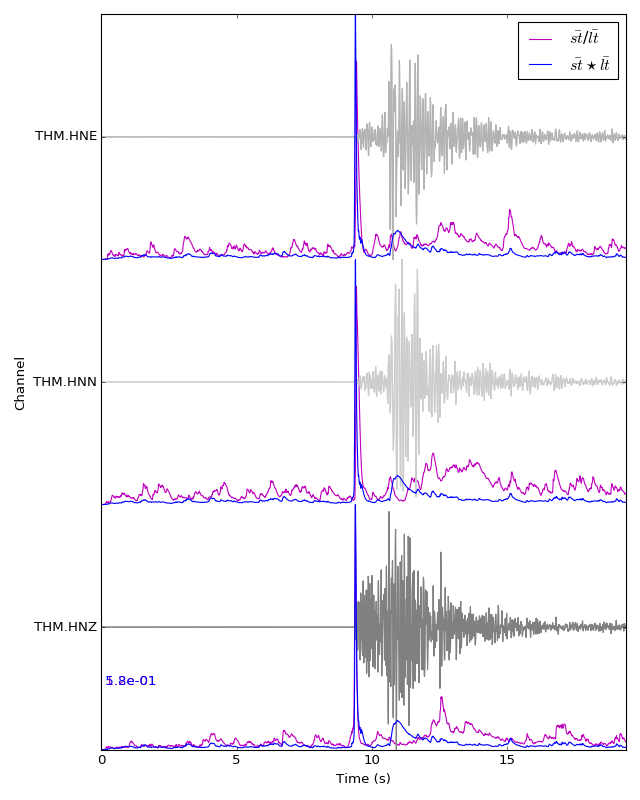

0.116867807627 0.00505217484793
0 Trace(s) in Stream:

3 Trace(s) in Stream:
CU.ANWB.00.EHN | 2010-07-25T23:43:38.725000Z - 2010-07-25T23:44:08.725000Z | 40.0 Hz, 1201 samples
CU.ANWB.00.EHE | 2010-07-25T23:43:38.725000Z - 2010-07-25T23:44:08.725000Z | 40.0 Hz, 1201 samples
CU.ANWB.00.EHZ | 2010-07-25T23:43:38.725000Z - 2010-07-25T23:44:08.725000Z | 40.0 Hz, 1201 samples


<IPython.core.display.Javascript object>


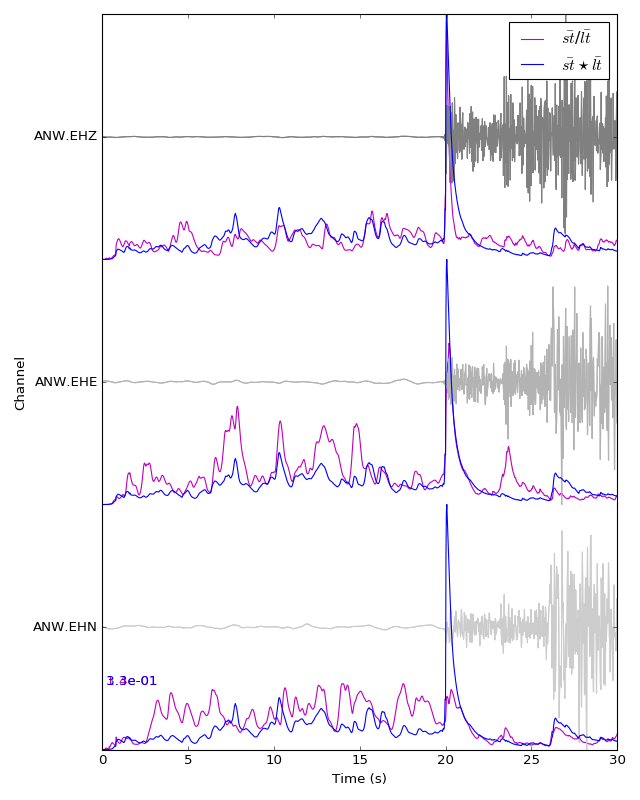

0.135279923238 0.0117048291317
0 Trace(s) in Stream:

0 Trace(s) in Stream:

N breaking


/usr/local/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


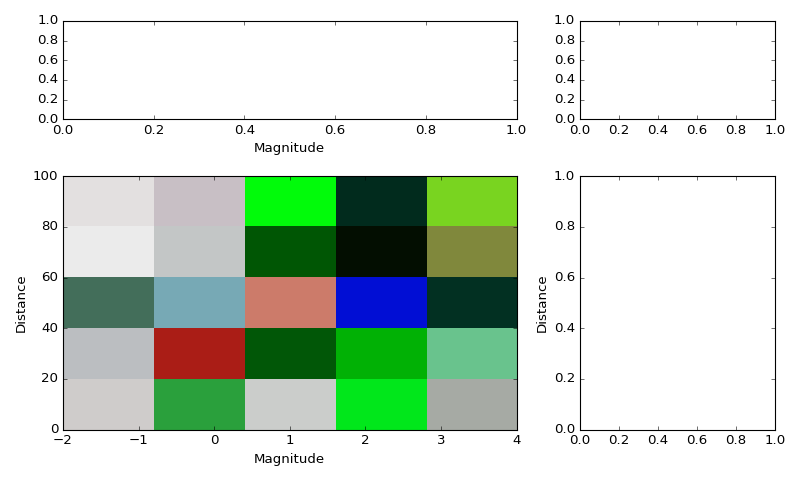

In [6]:
reload(trigger)

M_range = np.linspace(-2, 4, 5)
D_range = np.linspace(0, 100, 5) 
T_range = ['N','S','P','E']

M_step = (M_range[1]-M_range[0])/2.
D_step = (D_range[1]-D_range[0])/2.
[M_grid, D_grid] = np.meshgrid( M_range, D_range)
occupied = np.zeros([len(M_range),len(D_range)]) 
RGBA_NSPE = np.random.random([len(M_range),len(D_range),4]) 

test = 0
ntest = 0
target = len(M_range)*len(D_range)*.95
for arrival in np.random.permutation(len(metadata)) :
    
    D_cell = np.where(np.logical_and(D_range >= metadata[arrival][5]-D_step, D_range < metadata[arrival][5]+D_step))
    M_cell = np.where(np.logical_and(M_range >= metadata[arrival][9]-M_step, M_range < metadata[arrival][9]+M_step))

    if (metadata[arrival][2][0] in T_range) and (len(D_cell[0]) > 0) and (len(M_cell[0]) > 0) :       
        
        T_cell = T_range.index(metadata[arrival][2][0])
        
        if  occupied[D_cell[0], M_cell[0]] == 0 :            
            
            t = UTCDateTime(str(metadata[arrival][4]))  
            t += (metadata[arrival][6]-t.hour)*60*60 + \
                (metadata[arrival][7]-t.minute)*60 + \
                (metadata[arrival][8]-(t.second+t.microsecond/1000000.))
            st = client.get_waveforms(metadata[arrival][0], metadata[arrival][1], "*", "*[ENZ]", t-20, t+10)
                        
            if len(st) > 0 : 
            
                occupied[D_cell[0], M_cell[0]] = 1
                
                stlt_a = trigger.ShortLongTerms(data=st, statistic='average')#, scales=[3, 30])
                comp_rms = trigger.Component(data=st, statistic='rms')#, scales=[32])                
                
                stlt_a_corr = stlt_a.correlate.output()
                comp_e_corr = comp_rms.correlate.output()
                                
                ##
                ax = stlt_a.correlate.plot(label=r'$\bar{st}$/$\bar{lt}$')#
                comp_rms.correlate.plot(ax=ax, cfcolor='b', label=r'$\bar{st}\star\bar{lt}$')#
                legend = ax.legend()
                plt.show()
                
                print np.max(stlt_a_corr), np.median(stlt_a_corr)
                #print  metadata[arrival][4],'->',D_range[D_cell[0]], '\n', metadata[arrival][8],'->',M_range[M_cell[0]], '\n', metadata[arrival][2],'->',T_range[T_cell], '\n ========================='
                RGBA_NSPE[D_cell[0], M_cell[0], T_cell] = np.max(stlt_a_corr) # the wave at selected distance and magnitude
                RGBA_NSPE[D_cell[0], M_cell[0],      3] = 1#metadata[arrival][3] # the error at selected distance and magnitude
                RGBA_NSPE[D_cell[0], M_cell[0],      0] = np.median(stlt_a_corr) # the corresponding noise    

                if test >= target: 
                    print "fill breaking"
                    break
    ntest +=1
    if ntest >= 100: 
        print "N breaking"
        break 
        
fig = plt.figure(figsize=plt.figaspect(.6))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2))
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

imgplot = ax3.imshow(RGBA_NSPE, interpolation='nearest', extent=(M_range[0], M_range[-1], D_range[0], D_range[-1]))

ax3.set_aspect('auto')
ax1.set_xlabel('Magnitude')
ax3.set_xlabel('Magnitude')
ax3.set_ylabel('Distance')
ax4.set_ylabel('Distance')
plt.tight_layout()
plt.show()

The complete list of vertical records should be ready.

### Read data

The dataset includes all available components of each station in the selected dataset.

The set of waveform should be now ready.
# Algorithms comparisons 
## RMS vs Average


ImportError: No module named trigger

## STA $\star$ LTA

Let see if STA $\star$ LTA work as weel as STA/LTA. A visual comparison of STA/LTA with STA $\star$ LTA is given below.

36 waveform samples.


<IPython.core.display.Javascript object>


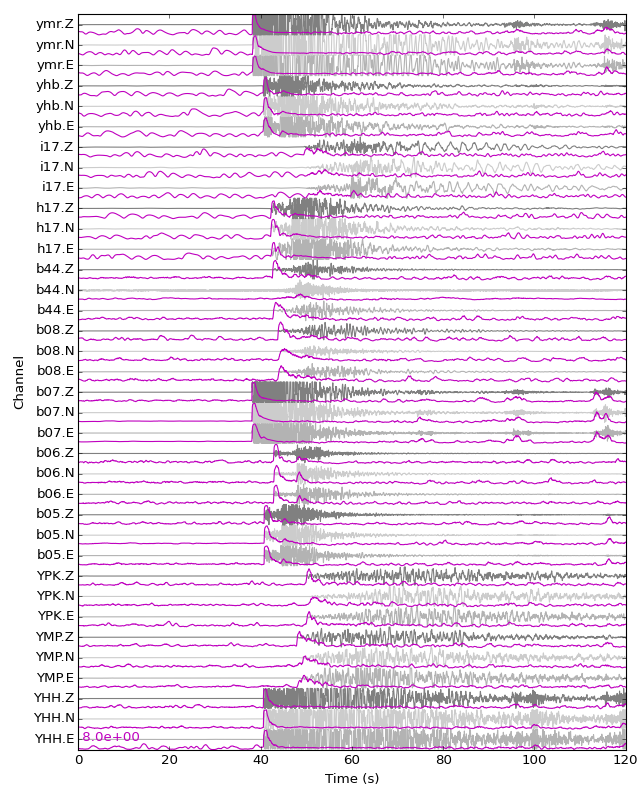

<IPython.core.display.Javascript object>


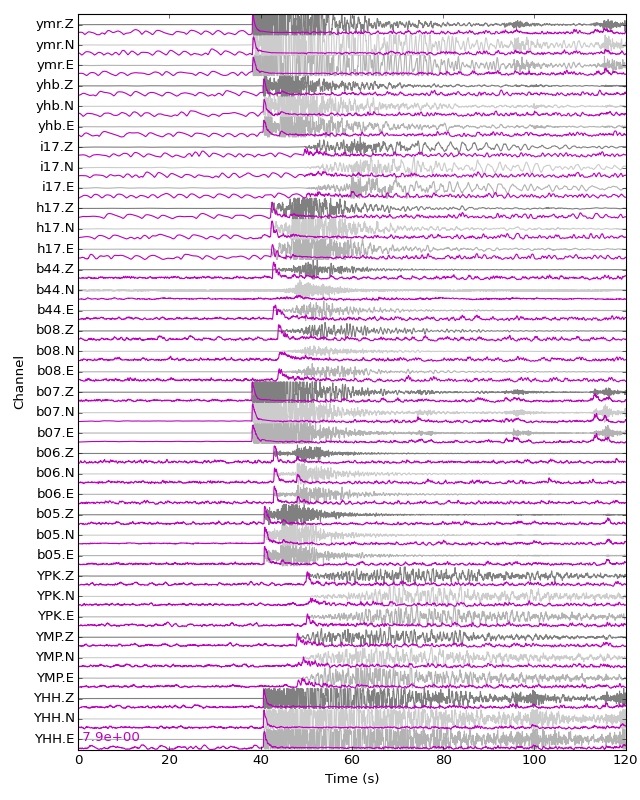

In [56]:

Nsample=10
paths = ["/Users/massin/Desktop/test"] #""/Users/massin/Documents/Data/Inventory/WY.sac","/Users/massin/Documents/Data/Inventory/ANT.ms"

reload(wrapper)
dataset=wrapper.readfullfilenames(paths)#,'relative')         
print dataset.index(dataset[-1])+1,'waveform samples.'

#dataset = wrapper.randomsample(dataset,Nsample,"[\.\-\_](Z|V|EHZ|HHZ|HNZ|ENZ|BHZ|LHZ)[\.\-\_]","existingonly")
#print dataset.index(dataset[-1])+1,'waveform samples selected.'
##print '\n'.join(dataset)
#print dataset[-1]
#print 'is the last.'


reload(wrapper)
waveformset = wrapper.readallchannels(dataset)


import trigger
reload(trigger)

stlt_multiplexor = trigger.ShortLongTerms(data=waveformset, statistic='average', scales=[64,512])#maxscale=1000)# statistic='rms' #scales=[10,500])#,
stlt_multiplexor.ratio.plot()

stlt_multiplexor = trigger.ShortLongTerms(data=waveformset, statistic='average', maxscale=1000)# statistic='rms' #scales=[10,500])#,
#stlt_multiplexor.plot()
stlt_multiplexor.ratio.plot()
#stlt_multiplexor.correlate.plot()

#### From example above, the advantages of STA $\star$ LTA are:
- no sensitivity to stepwise changes in signals,
- a better signal to noise ratio.
## LW $\star$ RW
let us reproduce the same test for LW/RW algorithm.

<IPython.core.display.Javascript object>


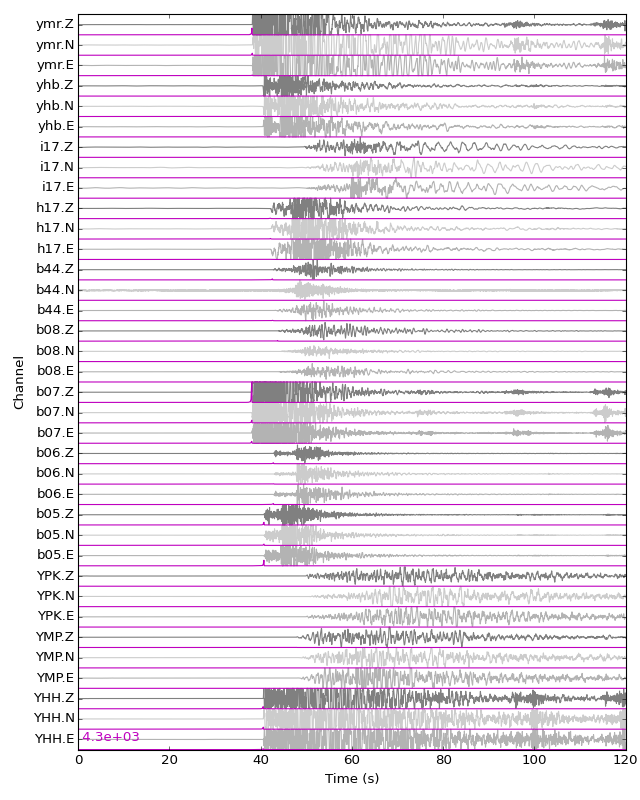

<IPython.core.display.Javascript object>


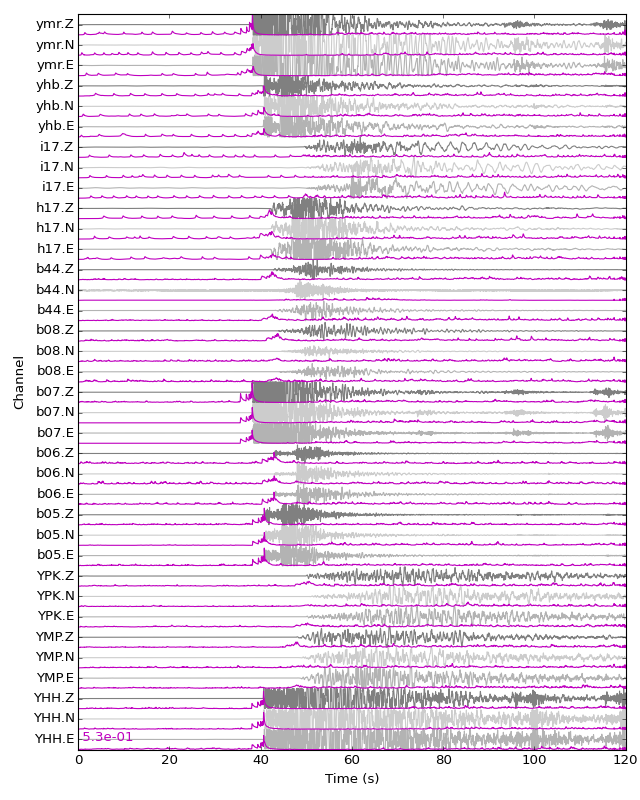

In [59]:
import trigger
reload(trigger)
ltrl_multiplexor = trigger.leftRightTerms(data=waveformset, statistic='rms', maxscale=300)#, windowlengths=[150,300,600]
#ltrl_multiplexor.plot()
ltrl_multiplexor.ratio.plot()
ltrl_multiplexor.correlate.plot()

Advantage of the ltrt:
- the local max align with wave arrival
## Components Energy $\star$
Let's try the Component Energy $\star$ 

<IPython.core.display.Javascript object>


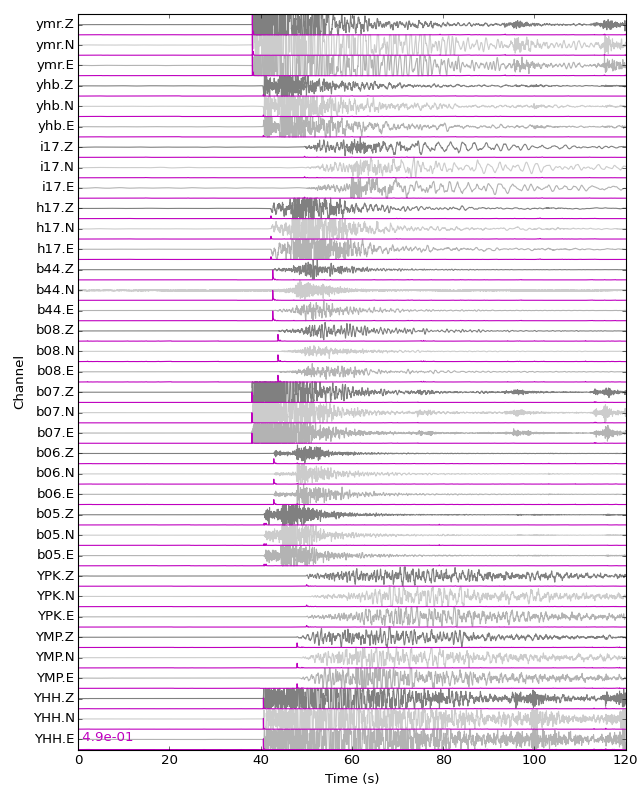

<IPython.core.display.Javascript object>


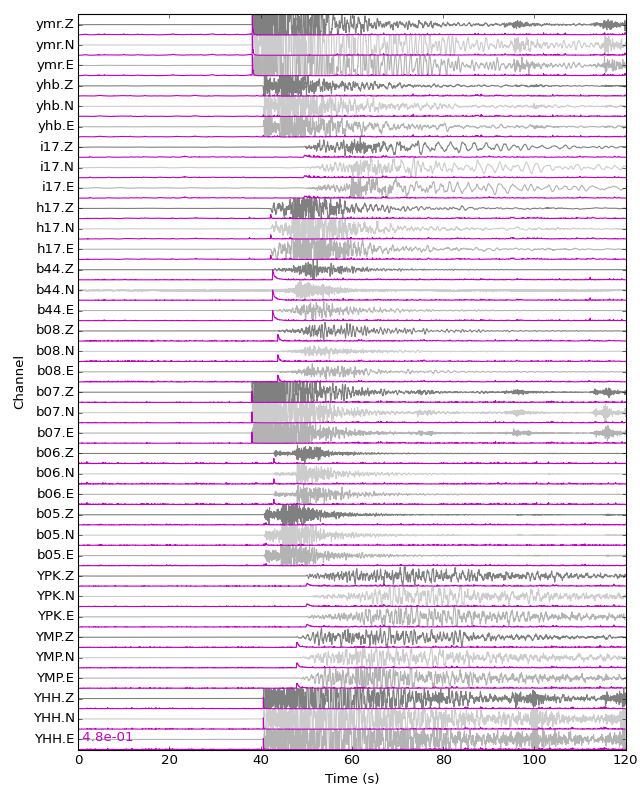

In [62]:
import trigger
reload(trigger)
n=150
ltrl_multiplexor = trigger.Component(data=waveformset, statistic='rms',scales=[n])#, maxscale=1000)#,scales=[150,300,600])#  maxscale=300)#,
#ltrl_multiplexor.plot()
test = trigger.Correlate(ltrl_multiplexor.output(),ltrl_multiplexor.data, scales=[n/10])
test.plot()
ltrl_multiplexor = trigger.Component(data=waveformset, statistic='rms', maxscale=1000)#,scales=[150,300,600])#  maxscale=300)#,
ltrl_multiplexor.correlate.plot()

<IPython.core.display.Javascript object>


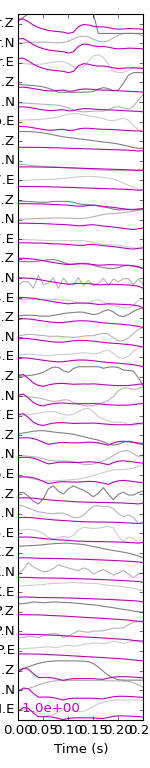

In [65]:
import trigger
reload(trigger)

ltrl_multiplexor = trigger.Component(data=waveformset, statistic='rms', maxscale=1000)#,scales=[150,300,600])#  maxscale=300)#,
wavelets, cfs = trigger.stream_trim_cf(waveformset, ltrl_multiplexor.correlate.output())

trigger.stream_processor_plot(wavelets, cfs)

# Export all figures
pdf files in a local directory.

In [ ]:
import matplotlib._pylab_helpers
figures=[manager.canvas.figure
         for manager in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
print(figures)
for i, figure in enumerate(figures):
    figure.savefig('A_better_picker/figure%d.pdf' % i)

# References

